# Wavelets in Python

---

## Overview

Computes the wavelet of time-series data

- Wavelet Overview
- Wavelet Implementation: PyWavelets
- Example: PyWavelets Morlet Power Spectrum

## Motivation

Wavelets are a common and powerful tool for analyzing time-series data. Time-series data is data that depends on time as well as frequency. For example, atmospheric data over a year where the temperature depends on the month of the year or a short audio sample where a limited amount of notes can be repeated in any order.

## Wavelet Inputs

- x: Input time-series data, for example: time and temperature in [nino3_sst](https://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt)
- wavelet: mother wavelet
- dt: sampling period (time between each y-value)
- s0: smallest scale
- dj: spacing between each discrete scales
- jtot: largest scale

## Mother Wavelet
There are many different kinds of continuous wavelets to choose from. The three most common (and used by NCL) are Morlet, Paul, and DOG. During wavelet analysis, a "mother" wavelet is replicated in many different "daughter" wavelets that are squished/streched based on the scales choosen. A mother wavelet is choosen based on the characteristics of the data and the features that are being investigated.

![example_wavelets](example_of_wavelets.png)

## Choosing Wavelet Scales

Scales determine the range that the wavelet anaylsis is senstitive to

- Large scale correspond to strenched wavelets that are sensitive to low frequency analysis
- Small scales correspond to a squished wavelet that are sensitive to high freqeuncy analysis

The smallest scale is most commonly equal to 2*sampling period (s0=2*dt)
- NCL sets smallest scale (s0) to sampling period when using Morlet (s0=dt)
- NCL sets smallest scale (s0) to 1/4th the sampling period when using Paul (s0=dt/4)

The largest scale is most commonly equal to:

```
import math

jtot = 1 + floattointeger(((log10(N*dt/s0))/dj)/log10(2.)) 

jtot = 1 + int(((math.log10(length of input data * sampling period/smallest scale))/spacing between each discrete scales)/math.log10(2))
```

The spacing between scales is commonly equal to 0.25 (dj=0.25) where a smallest spacing will produce a greater resolution of data but will run slower

## Wavelets in Python using PyWavelets

### [PyWavelets: pywt.cwt](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#pywt.cwt)

Wavelet analysis is accomplished in Python via external packages. NCL works with three wavelets: Morlet, DOG, and Paul. These three wavelets are continuious wavelets (CWT)

### PyWavelets: Morlet Wavelet

The Morlet mother wavelet is a complex wavelet, with both a real and imaginary component. NCL wavelets are based on "A Practical Guide to Wavelet Analysis" (Torrence and Compo). owever, PyWavelets functions are derived from "Computational Signal Processing with Wavelets" (Teolis) (which is the same to how [Matlab is defined](https://www.mathworks.com/help/wavelet/ref/cmorwavf.html)). The differences will be noted below. In PyWavelets this is known as "cmor" (complex morlet).

In [1]:
import math # access to pi (math.pi)
import numpy as np # access to complex numbers (real and imaginary)
import cmaps # access to NCL default plot colors
import matplotlib.pyplot as plt # plot data

import pywt # PyWavelets

### Define the Complex Morlet

PyWavelets defines a [Complex Morlet as `cmorB-C`](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#complex-morlet-wavelets) where B is the bandwidth and C is the center freqeuncy.

To match the morlet wavelet function being used by NCL (Torrence and Compo, Table 1) and the PyWavelets complex morlet (Teolis, pg. 65-66), set bandwidth value `B=sqrt(pi)` and center frequency `C=6/2*pi`

![compare_tc_cmor](compare_tc.png)

In [2]:
bandwidth = math.sqrt(math.pi)
center_freq = 6/(2*math.pi)
wavelet_mother = f"cmor{bandwidth}-{center_freq}"

In [3]:
# Download nino3 data
nino_url = 'https://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
sst_data = np.genfromtxt(nino_url, skip_header=19)

In [4]:
# PyWavelet Input Values
dt = 0.25 # sampling period (time between each y-value)
s0 = 0.25 # smallest scale
dj = 0.25 # spacing between each discrete scales
jtot = 44 # largest scale
scales = np.arange(1, jtot+1)
wavelet_coeffs, freqs = pywt.cwt(data=sst_data,
                                 scales=scales,
                                 wavelet=wavelet_mother,
                                 sampling_period=dt)

## Power Spectrum

Wavelet_coeff is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number

```
real_component = abs(wavelet_coeffs)
```

The real component represents the magntiude of the wavelet coefficient displayed as the absolute value of the coefficients squared

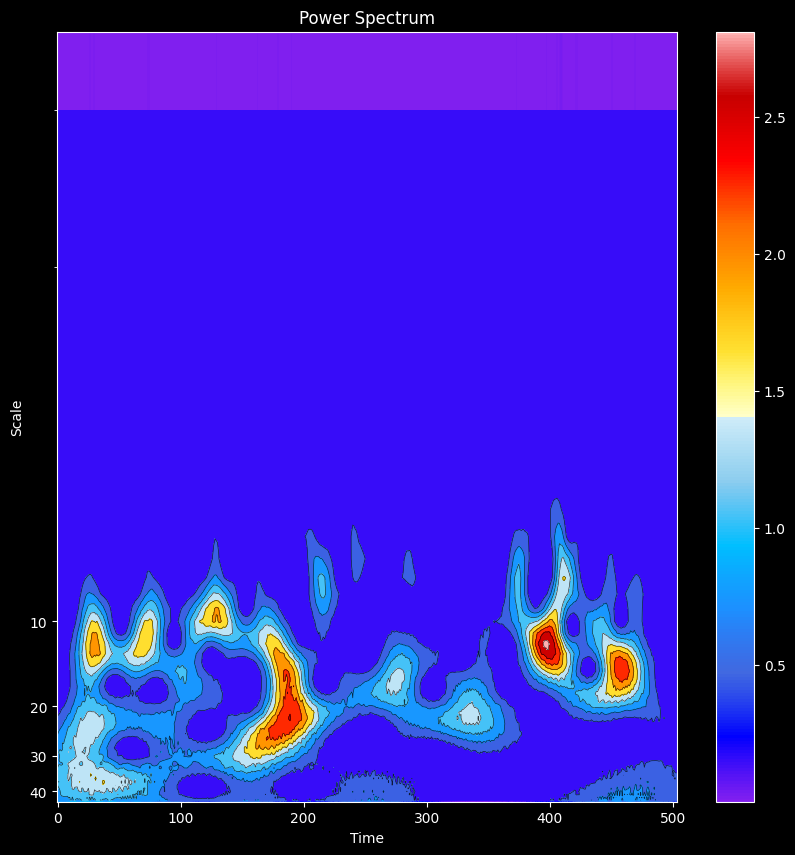

In [6]:
power = np.power((abs(wavelet_coeffs)), 2)  # compare the power spectrum (absolute value squared)

# Plot scalogram
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_yscale("symlog")
ax.invert_yaxis()
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_yticklabels([10, 20, 30, 40, 50])

plt.contourf(power,
             vmax=(power).max(), vmin=(power).min(),
             cmap=cmaps.ncl_default, levels=10)
plt.contour(power, levels=10, colors="k", linewidths=0.5, alpha=0.75)

plt.title("Power Spectrum")
plt.xlabel("Time")
plt.ylabel("Scale")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap=cmaps.ncl_default, aspect="auto")
plt.colorbar()
plt.show()

## Further Reading

- [PyWavelets CWT](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#pywt.cwt)
- ["A Practical Guide to Wavelet Analysis" (Torrence and Compo)](https://psl.noaa.gov/people/gilbert.p.compo/Torrence_compo1998.pdf)